In [19]:
# importing data
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# importing dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

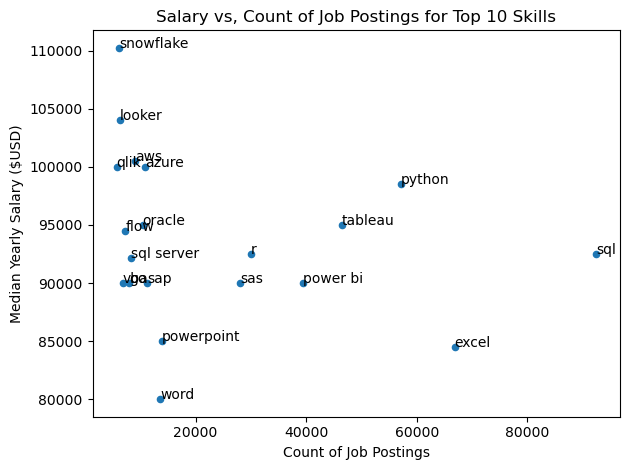

In [25]:
df = df[df["job_title_short"] == "Data Analyst"]
skill_no = 20
dfe = df.explode("job_skills")
skill_stats = dfe.groupby("job_skills").agg(
    skill_count=("job_skills", "count"), 
    median_salary=("salary_year_avg", "median") 
)
skill_stats = skill_stats.sort_values(by="skill_count", ascending=False).head(skill_no)
skill_stats.plot(kind="scatter", x = "skill_count", y = "median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Salary vs, Count of Job Postings for Top 10 Skills")
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], txt)

plt.show()
